In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('billboard.csv')
df.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [4]:
df = df.drop(columns= {"url", "week_id", "song_id", "instance", "previous_week_position", "peak_position"})

PART A

In [5]:
#Group by Performer and Song and count the total weeks they were on the charts
part_a = df.groupby(["performer", "song"])["week_position"].agg("count").sort_values(ascending = False)
print(part_a[:10])

performer                                  song                               
Imagine Dragons                            Radioactive                            87
AWOLNATION                                 Sail                                   79
The Weeknd                                 Blinding Lights                        76
Jason Mraz                                 I'm Yours                              76
LeAnn Rimes                                How Do I Live                          69
OneRepublic                                Counting Stars                         68
LMFAO Featuring Lauren Bennett & GoonRock  Party Rock Anthem                      68
Jewel                                      Foolish Games/You Were Meant For Me    65
Adele                                      Rolling In The Deep                    65
Carrie Underwood                           Before He Cheats                       64
Name: week_position, dtype: int64


PART B

In [6]:
part_b_df = df[(df["year"] != 1958) & (df['year'] != 2021)]
print(len(part_b_df))
part_b_df.drop_duplicates(subset = ['year', 'performer', 'song'], inplace = True)
print(len(part_b_df))

323495
35078


C:\Users\shara\AppData\Local\Temp\ipykernel_6080\3480979645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_b_df.drop_duplicates(subset = ['year', 'performer', 'song'], inplace = True)


In [7]:
part_b_df = part_b_df.sort_values(by = "year")

Text(0.5, 1.0, '# of Unqiue Songs each Year')

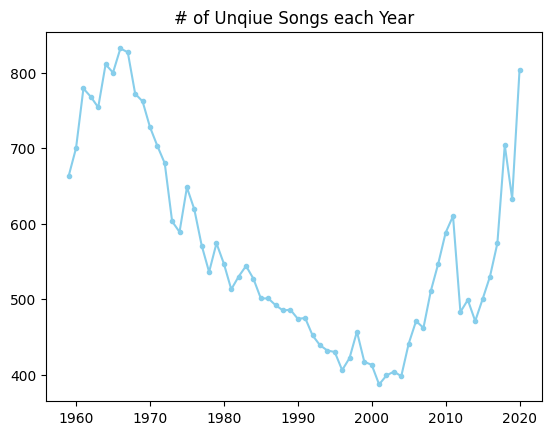

In [8]:
years_to_plot = part_b_df['year'].value_counts().sort_index()
plt.plot(years_to_plot, marker = ".", color = "skyblue")
plt.title("# of Unqiue Songs each Year")

The number of unique songs declined from 1970 onwards until slightly going up in the lates 90s and then trending upwards in the mid 2000s 

PART C

In [9]:
#We first group by performer and song and filter for those where the count is greater than 10 
part_c_df = pd.DataFrame(df.groupby(['performer', 'song'])['week'].count().sort_values(ascending =False))


In [10]:
part_c_df = part_c_df[part_c_df['week'] >= 10].reset_index()

In [11]:
#Filter for Artists with atleast 30 top-10 week hits
part_c_df = pd.DataFrame(part_c_df.groupby(['performer'])['week'].count().sort_values(ascending =False))


Text(0, 0.5, 'Count of Songs')

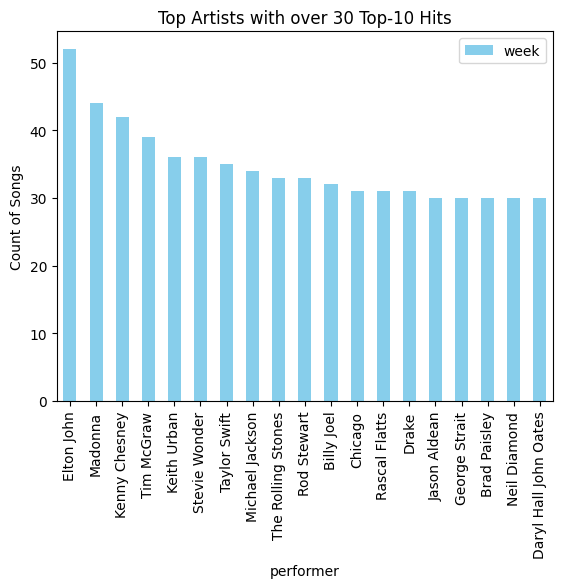

In [12]:
part_c_df[part_c_df['week'] >= 30].plot(kind="bar", color = "skyblue")
plt.title("Top Artists with over 30 Top-10 Hits")
plt.ylabel("Count of Songs")